Questions for Week0

Do not change anything in the code for numpy part  ..... just write the functions with the content your are given.

Request: Refrain from using any external source for coding for this week, like chatgpt(try to do it by youself as much as you can )






While using numpy, we mostly deal with matrix operations. So, let's building our own inverse function

This function:\
1 Takes a np.array of size nXn ... it is your job to check if the matrix is a square matrix or not :)\
2 Returns the inverse of the matrix if possible, otherwise, returns a matrix of 0s

In [11]:
import numpy as np

def inverse(matrix):
    '''
    implement your function here
    you are not allowed to use the inbuilt inverse function in numpy
    feel free to use your favourite algorithm to calculate the inverse :)
    '''
    m,n=matrix.shape
    if m!=n:
         return np.zeros((m,n))
    
    augmented_matrix = np.hstack([matrix, np.eye(m)])

    for i in range(m):
        diag_element = augmented_matrix[i][i]
        if diag_element == 0:
            return np.zeros((m,n))
        augmented_matrix[i] /= diag_element
        for j in range(m):
            if i != j:
                augmented_matrix[j] -= augmented_matrix[j][i] * augmented_matrix[i]
    
    matrix_inverse = augmented_matrix[:, m:]
    return matrix_inverse

    pass

Do not believe your code this easily man.

Now you will write a code to test out if your inverse is indeed correct

The test function will take an np.array

The test function will return:\
1 True, if the inverse is correct\
2 False if the inverse is incorrect

Isn't it amazing :)

In [23]:
def test(matrix):
    '''
    you will have to use np.linalg.inv to get the inverse and check the value got from your inverse function
    ofc you will have to see if the matrix is invertible or not :)
    before that, if it is a square matrix or not :)
    '''

    m,n=matrix.shape
    if m!=n or np.linalg.det(matrix) == 0:
         return True

    return np.allclose(np.linalg.inv(matrix), inverse(matrix))


Here is the code to test out your implementations of the upper two functions.

In [24]:
flag = True
for i in range(908):
    n = np.random.randint(2,6)
    m = n + (np.random.randint(0,2) % 2 != 0)
    matrix = np.random.randint(0, 20, size=(n,m)) + np.random.rand(n,m)
    if (not test(matrix)):
        flag = False
        print("You passed", i, "testcases:(")
        break
if (flag):
    print("Congrats!!! You passed all testcases")

Congrats!!! You passed all testcases




Let's move on to pandas and matplotlib

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

Here you are going to do data analysis on the given SEER Breast Cancer Dataset

Question 1: Tumor Size and Survival Analysis

Task:

Investigate the relationship between tumor size and survival.

1.Filter the data to include only cases where tumor size is greater than 20 mm.

2.Group the data by cancer stage and calculate the average survival months for each stage.

3.Create a line plot showing the relationship between cancer stage and average survival months.

In [26]:
#code here
data=pd.read_csv("SEER Breast Cancer Dataset .csv")

filtered_data = data[data["Tumor Size"] > 20]

average_survival = (
    filtered_data.groupby("Grade")["Survival Months"]
    .mean()
    .reset_index()
)


In [28]:
average_survival

,Grade,Survival Months
0,Moderately differentiated; Grade II,71.125823
1,Poorly differentiated; Grade III,66.898817
2,Undifferentiated; anaplastic; Grade IV,59.857143
3,Well differentiated; Grade I,72.114504


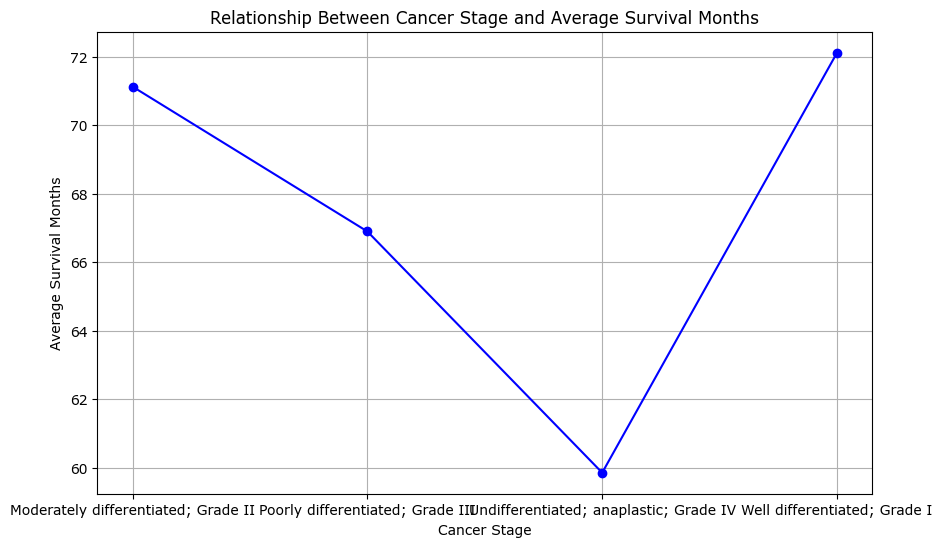

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(
    average_survival["Grade"],
    average_survival["Survival Months"],
    marker="o",
    linestyle="-",
    color="b",
)
plt.title("Relationship Between Cancer Stage and Average Survival Months")
plt.xlabel("Cancer Stage")
plt.ylabel("Average Survival Months")
plt.grid(True)
plt.show()


Question 2: Estrogen Receptor Status vs. Regional Nodes

Task:

Examine how estrogen receptor status affects regional lymph node involvement.

1.Group the data by estrogen receptor status (positive or negative) and calculate the average number of regional nodes positive.

2.Create a bar plot to compare the average number of positive nodes for the two groups.

3.Interpret the results and discuss the implications of the findings.

In [36]:
#code here
average_nodes = (
    data.groupby("Estrogen Status")["Reginol Node Positive"]
    .mean()
    .reset_index()
)
average_nodes


,Estrogen Status,Reginol Node Positive
0,Negative,5.799257
1,Positive,4.040479


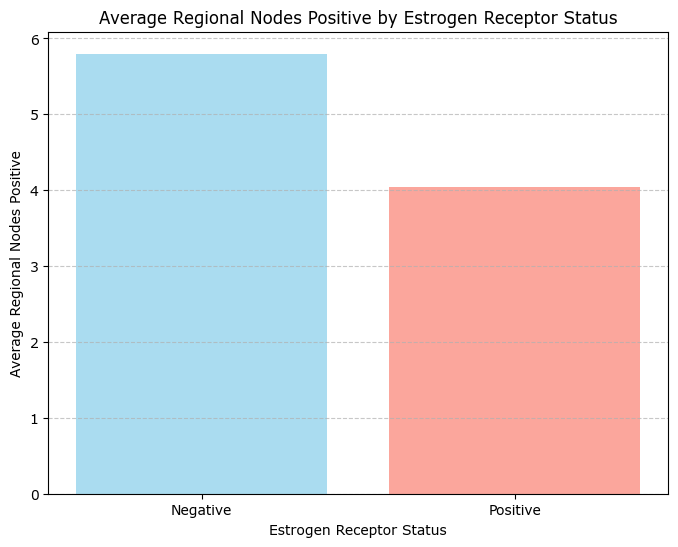

In [38]:

# 2. Create a bar plot to compare the average number of positive nodes for the two groups
plt.figure(figsize=(8, 6))
plt.bar(
    average_nodes["Estrogen Status"],
    average_nodes["Reginol Node Positive"],
    color=["skyblue", "salmon"],
    alpha=0.7,
)
plt.title("Average Regional Nodes Positive by Estrogen Receptor Status")
plt.xlabel("Estrogen Receptor Status")
plt.ylabel("Average Regional Nodes Positive")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()